### 학습목표
- 데이터 탐색을 위한 기술통계 분석을 실습하자!
##### 데이터 분석 (머신러닝) 7과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. EDA (탐색적 데이터 분석) -> 기술통계량 확인, 시각화
5. 모델 선택 및 하이퍼파라미터 조절
6. 모델 학습
7. 모델 평가

In [2]:
import pandas as pd

In [13]:
 # HR 데이터를 활용하여 데이터 탐색
# HR 데이터 불러오기
hr_info = pd.read_csv('data/hr-info.csv', encoding='euc-kr')
hr_info.head()

EID ENAME GENDER  ORG_CD POS_CD  AGE  SERVICE_YEAR EDU_LEVEL  \
0  E00206   시이오      M     NaN   P001   49            25     박사 학위   
1  E00181   나사장      F     NaN   P002   49            24     박사 학위   
2  E00164  난부사장      M     NaN   P003   48            22     박사 학위   
3  E00190   판라다      F  ORG007   P004   47            18     박사 학위   
4  E00209   누훈봉      M  ORG023   P004   47            19     박사 학위   

   PERFORMANCE_SCORE  SALARY LAST_PROMO_DT  TRAINING_HOURS  \
0               4.50   10200    2024-03-01             240   
1               4.60    9500    2024-03-01             236   
2               4.60    9100    2024-03-01             240   
3               3.51    8500    2024-03-01              96   
4               3.38    8600    2023-03-01              66   

                            SKILLS ACTIVE_STATE   HIRE_DATE RETIRE_DATE  \
0            Marketing, Salesforce            Y  1999-03-01         NaN   
1    Project Management, Marketing            Y  2000-03-01         NaN   
2  Salesforce, Data Analysis, Java            Y  2002-03-01         NaN   
3  Java, Data Analysis, Salesforce            Y  2006-03-01         NaN   
4                 Java, Salesforce            Y  2005-03-01         NaN   

  RETIRE_REASON REHIRE_YN NATION ROUNDING_DEDUCTION  
0           NaN       NaN  KOREA                  Y  
1           NaN       NaN  KOREA                  Y  
2           NaN       NaN  KOREA                  Y  
3           NaN       NaN  KOREA                  Y  
4           NaN       NaN  KOREA                  Y

In [15]:
# 기술통계량 확인 -> 수치데이터의 기본적인 통계수치를 보여준다!
hr_info.describe()
# count: 데이터의 개수
# mean: 평균
# std: 표준편차 (평균에서 값들이 떨어져있는 정도) -> 분산에 루트를 씌운
# min: 최솟값, max: 최댓값
# 25%, 50%, 75% : 사분위수 
# -> 데이터를 오름차순 정렬 후 순서대로 25%, 50%, 75% 위치해있는값
# 사분위수를 통해 데이터의 전체적인 분포를 확인

AGE  SERVICE_YEAR  PERFORMANCE_SCORE        SALARY  \
count  200.000000    200.000000         200.000000    200.000000   
mean    31.930000      4.660000           1.919900   5987.000000   
std      7.111114      6.183492           1.748062   1182.676889   
min     22.000000      0.000000           0.000000   4500.000000   
25%     27.000000      0.000000           0.000000   5000.000000   
50%     30.000000      1.000000           1.795000   5600.000000   
75%     37.000000      8.000000           3.412500   6825.000000   
max     49.000000     25.000000           4.960000  10200.000000   

       TRAINING_HOURS  
count      200.000000  
mean        34.745000  
std         40.470971  
min          0.000000  
25%          4.000000  
50%         21.000000  
75%         56.750000  
max        240.000000

In [17]:
# 데이터 확인
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [21]:
# object(문자열) 타입의 기술통계량 확인
hr_info.describe(include=['object'])
# count : 데이터의 개수
# unique: 중복 없이 유일한 값 의 개수
# top: 유일한 값들 -> 카테고리들 중 가장 많이 등장한 값
# freq: frequency 빈도수 -> top 값이 나온 빈도수

EID ENAME GENDER  ORG_CD POS_CD EDU_LEVEL LAST_PROMO_DT  \
count      200   200    200     197    200       200           182   
unique     200   200      2      30      9         5             4   
top     E00206   시이오      M  ORG021   P008     학사 학위    2024-03-01   
freq         1     1    117      12     55       159           111   

            SKILLS ACTIVE_STATE   HIRE_DATE RETIRE_DATE RETIRE_REASON  \
count          200          200         200          49            49   
unique          91            2          16           8             6   
top     Salesforce            Y  2024-03-01  2024-03-01            이직   
freq            24          151          64          19            28   

       REHIRE_YN NATION ROUNDING_DEDUCTION  
count         49    200                200  
unique         2      6                  2  
top            N  KOREA                  Y  
freq          45    102                150

### 범용함수
- 데이터.sum(): 합계를 구할때 사용
- 데이터.mean(): 평균을 구할때 사용
- 데이터.count(): 데이터의 개수를 셀때 사용 (값이 있으면 카운팅)
- 데이터.value_counts(): 각 값의 개수를 셀때 사용
- 데이터.unique(): 중복없이 유일한 값들을 출력할때 사용
- 데이터.min(): 최솟값
- 데이터.max(): 최댓값

In [26]:
# 성별데이터의 개수 확인 -> count()
hr_info['GENDER'].count()

200

In [28]:
# 성별데이터 값의 개수 확인 -> value_counts()
hr_info['GENDER'].value_counts()

GENDER
M    117
F     83
Name: count, dtype: int64

In [30]:
# 직원들의 국적(NATION) 종류를 알아보자!
hr_info['NATION'].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

In [34]:
# 최대 근속년수, 최소 근속년수 확인 (SERVICE_YEAR)
print(f"최대 근속년수: {hr_info['SERVICE_YEAR'].max()} ")
print(f"최소 근속년수: {hr_info['SERVICE_YEAR'].min()} ")

최대 근속년수: 25 
최소 근속년수: 0 


In [38]:
# 평균 근속년수, 중앙값을 활용한 근속년수 확인
print(f"평균 근속년수: {hr_info['SERVICE_YEAR'].mean()} ")
print(f"중앙값 근속년수: {hr_info['SERVICE_YEAR'].median()} ")


평균 근속년수: 4.66 
중앙값 근속년수: 1.0 


- 교육 수준에 따른 평균 연봉 확인해보자!

In [41]:
# 교육수준의 종류 확인
hr_info['EDU_LEVEL'].unique()

array(['박사 학위', '학사 학위', '석사 학위', '고등학교 졸업', '전문대 학위'], dtype=object)

In [58]:
# 교육수준이 '박사 학위' 인 직원의 평균연봉 확인 
# 연봉: SALARY 컬럼

# 교육수준이 '박사 학위' 인 직원
df = hr_info[hr_info['EDU_LEVEL'] == '박사 학위']
df
# 연봉 평균
df['SALARY'].mean()

8166.666666666667

In [ ]:
hr_info[hr_info['EDU_LEVEL'] == '박사 학위']['SALARY'].mean()

In [62]:
# 반복문을 활용해서 전체 교육수준에 따른 연봉 출력
for edu_level in hr_info['EDU_LEVEL'].unique():
    print(edu_level ,hr_info[hr_info['EDU_LEVEL'] == edu_level]['SALARY'].mean())

박사 학위 8166.666666666667
학사 학위 5727.044025157233
석사 학위 6900.0
고등학교 졸업 6140.0
전문대 학위 5050.0


### 데이터 그룹화를 통한 통계분석

In [73]:
# 연봉, 교육수준에 따른 평균값
hr_info[["SALARY", "EDU_LEVEL"]].groupby(by = 'EDU_LEVEL').mean()

SALARY
EDU_LEVEL             
고등학교 졸업    6140.000000
박사 학위      8166.666667
석사 학위      6900.000000
전문대 학위     5050.000000
학사 학위      5727.044025

In [77]:
# 두개 이상의 기준을 가지고 그룹화
# 교육수준 및 성별에 따른 평균연봉 확인
# 3개컬럼 추출
hr_info[['SALARY','EDU_LEVEL','GENDER']]
# 그룹화
hr_info[['SALARY','EDU_LEVEL','GENDER']].groupby(by = ["EDU_LEVEL", "GENDER"]).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

In [79]:
hr_info['SALARY'].mean()

5987.0

In [81]:
hr_info[["SALARY", "EDU_LEVEL"]]


SALARY EDU_LEVEL
0     10200     박사 학위
1      9500     박사 학위
2      9100     박사 학위
3      8500     박사 학위
4      8600     박사 학위
..      ...       ...
195    4500     학사 학위
196    4500     학사 학위
197    4500     학사 학위
198    4500     학사 학위
199    4500     학사 학위

[200 rows x 2 columns]

In [87]:
# 교육수준별 평균 나이 구하기
hr_info[['AGE', 'EDU_LEVEL']].groupby(by = 'EDU_LEVEL' ).mean()

AGE
EDU_LEVEL           
고등학교 졸업    33.100000
박사 학위      43.333333
석사 학위      37.294118
전문대 학위     26.000000
학사 학위      30.496855

In [91]:
hr_info[["SALARY", "EDU_LEVEL"]].groupby(by = 'EDU_LEVEL')
# 두개의 결과값을 출력
# 그룹화한 카테고리 이름 ,그룹화한 결과 (DataFrame)
for idx, df in hr_info[["SALARY", "EDU_LEVEL"]].groupby(by = 'EDU_LEVEL'):
    display(idx)
    display(df)

'고등학교 졸업'

SALARY EDU_LEVEL
11     8500   고등학교 졸업
18     7100   고등학교 졸업
25     7300   고등학교 졸업
57     6900   고등학교 졸업
68     6800   고등학교 졸업
87     5700   고등학교 졸업
108    5600   고등학교 졸업
185    4500   고등학교 졸업
188    4500   고등학교 졸업
190    4500   고등학교 졸업

'박사 학위'

SALARY EDU_LEVEL
0     10200     박사 학위
1      9500     박사 학위
2      9100     박사 학위
3      8500     박사 학위
4      8600     박사 학위
10     8600     박사 학위
13     8500     박사 학위
17     7600     박사 학위
19     7500     박사 학위
51     7100     박사 학위
56     7000     박사 학위
105    5800     박사 학위

'석사 학위'

SALARY EDU_LEVEL
6      8500     석사 학위
7      8600     석사 학위
12     8500     석사 학위
15     7300     석사 학위
16     7200     석사 학위
20     7500     석사 학위
22     7200     석사 학위
42     7000     석사 학위
45     7000     석사 학위
49     6700     석사 학위
60     7000     석사 학위
71     6900     석사 학위
81     5700     석사 학위
97     5700     석사 학위
104    5700     석사 학위
119    5700     석사 학위
170    5100     석사 학위

'전문대 학위'

SALARY EDU_LEVEL
107    5600    전문대 학위
189    4500    전문대 학위

'학사 학위'

SALARY EDU_LEVEL
5      8300     학사 학위
8      8500     학사 학위
9      8500     학사 학위
14     8300     학사 학위
21     7200     학사 학위
..      ...       ...
195    4500     학사 학위
196    4500     학사 학위
197    4500     학사 학위
198    4500     학사 학위
199    4500     학사 학위

[159 rows x 2 columns]

### 그룹화 후 여러가지의 통계값 확인
- agg()

In [96]:
hr_info[["SALARY", "EDU_LEVEL"]].groupby(by = 'EDU_LEVEL').agg(['mean','max','min','median'])

SALARY                     
                  mean    max   min  median
EDU_LEVEL                                  
고등학교 졸업    6140.000000   8500  4500  6250.0
박사 학위      8166.666667  10200  5800  8500.0
석사 학위      6900.000000   8600  5100  7000.0
전문대 학위     5050.000000   5600  4500  5050.0
학사 학위      5727.044025   8500  4500  5600.0

### 그룹화 후 컬럼별로 다른 연산결과 확인

In [99]:
# 국적에 따른 평균 성과평가 점수와 최대연봉 확인하기
# PERFORMANCE_SCORE -> 평균 mean
# SALARY -> 최대값 max
hr_info.groupby(by = 'NATION').agg({"PERFORMANCE_SCORE":"mean",
                                   "SALARY": "max"})

PERFORMANCE_SCORE  SALARY
NATION                           
China            2.550000    7400
India            1.854545    8300
Japan            2.672381    8600
KOREA            1.461765   10200
UK               2.692778    7300
USA              2.329091    8500

### 상관계수 분석
- 두 변수 사이의 관계를 수치화 하여 확인하는 방법
- -1~1 사이의 값을 가진다!
- -1 에 가까울수록 음의 상관관계
  - 예시: 다이어트 의지(x)가 커질수록 체중(y) 감소
- 1에 가까울수록 양의 상관관계
  - 예시: 식욕(x)이 커질수록 체중(y) 증가
- 주의! 음수 값이라고 해서 상관관계가 없다는것이 아니다!! > 0에가까울수록 관련이 없는 변수들이다!!
- 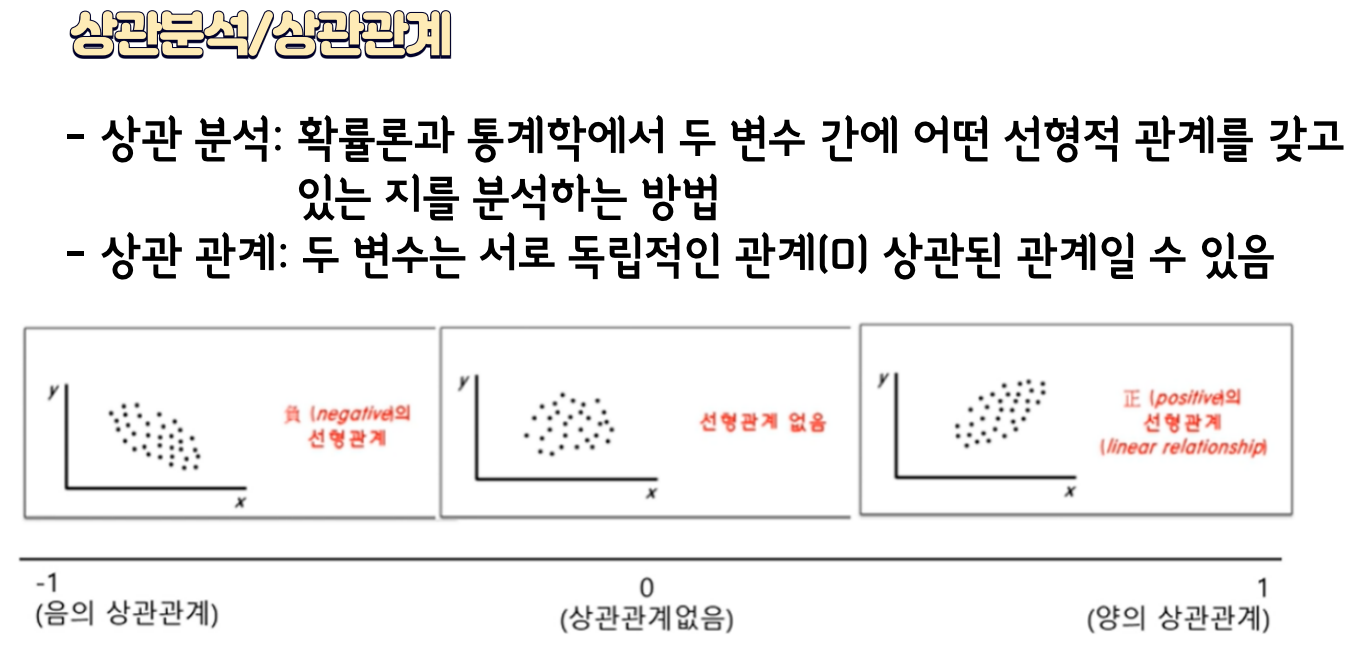

In [106]:
# 직원의 성과평가점수와 연봉의 상관계수 확인
hr_info[["PERFORMANCE_SCORE","SALARY"]].corr()
# 성과평가점수가 높아질수록 연봉도 높아지는구나!

PERFORMANCE_SCORE    SALARY
PERFORMANCE_SCORE           1.000000  0.609152
SALARY                      0.609152  1.000000

In [112]:
# 전체데이터의 상관계수 확인
df = hr_info.corr(numeric_only=True)
# 절대값으로 1에 가까울수록 상관관계가 높은 변수들이다!!
# 정답에 영향을 많이 미치는 특성만을 학습시킬때 사용하면 유용

In [126]:
df['SALARY'].abs().sort_values(ascending=False)

SALARY               1.000000
SERVICE_YEAR         0.970875
AGE                  0.961699
TRAINING_HOURS       0.628931
PERFORMANCE_SCORE    0.609152
Name: SALARY, dtype: float64